# Лабораторная работа №1: Поэлементные преобразования изображений
## Вариант: №7

## Выполнил: Соколов Роман

## Группа: 6131-010402D

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def from_rgb_to_bgr(arr):
    return cv2.cvtColor(arr, cv2.COLOR_RGB2BGR)

In [3]:
def from_bgr_to_rgb(arr):
    return cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)

# Гистограмма изображения

In [146]:
def histog1(image1):
    image = image1.copy()
    hist_data = image.reshape((image.size, 1))
    f, ax = plt.subplots(figsize=(5, 5))
    hist_original = sns.histplot(hist_data, bins=256, ax=ax, legend=None)
    ax.set(xlim=(0,255))
    plt.show()

In [30]:
def histog2(image1):
    image = image1.copy()
    hist_data = image.reshape((image.size, 1))
    f, ax = plt.subplots(figsize=(5, 5))
    hist_original = sns.histplot(hist_data, bins=256, ax=ax, legend=None)
    ax.set(xlim=(0,255))
    plt.show()
    plt.imshow(image, vmin=0, vmax=255)
    plt.show()

# 1. Считать цветное rgb изображение

In [31]:
x = cv2.imread('images/cat1.jpg', cv2.IMREAD_COLOR)

Исходное изображение


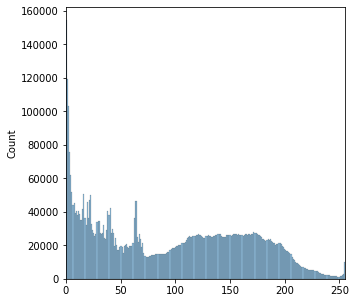

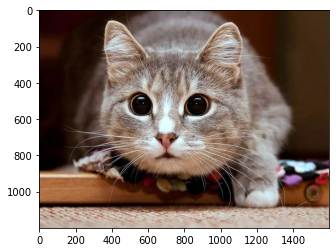

In [168]:
print("Исходное изображение")
histog2(from_bgr_to_rgb(x))

# 2. Преобразовать изображение в градации серого

In [33]:
#gray = 0.216 * r + 0.715 * g + 0.072 * b

In [34]:
def monochrome2(arr1):
    arr = arr1.copy()
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            arr[i, j] = np.array([np.mean(arr[i, j])])
    return arr

Преобразованное изображение в градации серого


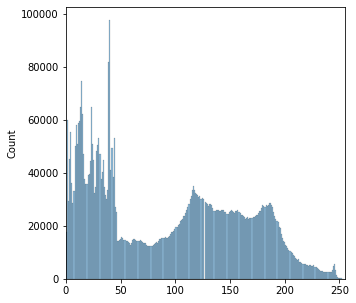

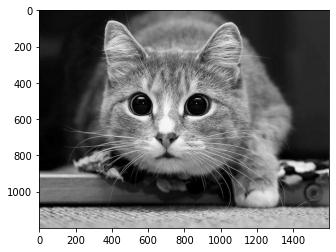

In [169]:
print('Преобразованное изображение в градации серого')
x1 = monochrome2(x)
histog2(x1)

# 3. Написать функцию реализации препарирования изображения

### представление «рабочего» интервала яркостей на однородном фоне: белом 

In [170]:
def func_prep(arr1):
    arr = arr1.copy()
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i][j][0] < 125:
                arr[i][j][0] = 255
                arr[i][j][1] = 255
                arr[i][j][2] = 255
            else:
                arr[i][j][0] = 0
                arr[i][j][1] = 0
                arr[i][j][2] = 0
    return arr

In [171]:
def my_otsu(image, prepfun=func_prep):
    return prepfun(image)

# 4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением

In [143]:
def porog(arr1, ths):
    arr = arr1.copy()
    return np.vectorize(lambda x: 255 if x > ths else 0)(arr)

In [144]:
x2 = porog(x1, 125)

Исходное изображение


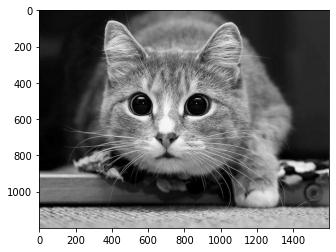

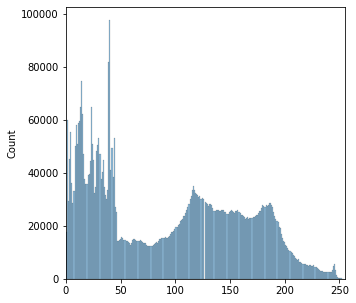

In [173]:
print('Исходное изображение')
plt.imshow(x1)
histog1(x1)

Изображение после пороговой обработки:


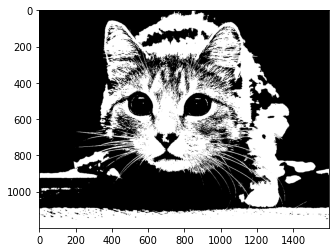

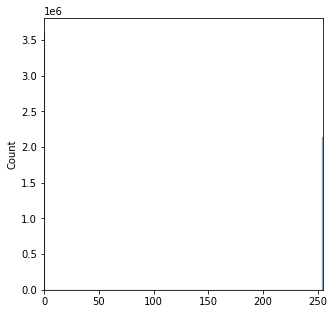

In [174]:
print("Изображение после пороговой обработки:")
plt.imshow(x2)
histog1(x2)

## 5. Сделать пороговую обработку методом Otsu (Функция OpenCV)

In [149]:
ret,x3 = cv2.threshold(x1,125,255,cv2.THRESH_BINARY)
ret

125.0

Исходное изображение


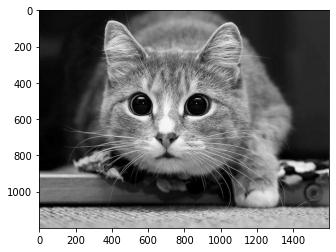

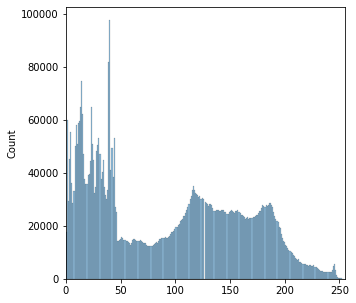

In [176]:
print('Исходное изображение')
plt.imshow(x1)
histog1(x1)

Изображение после пороговой обработки


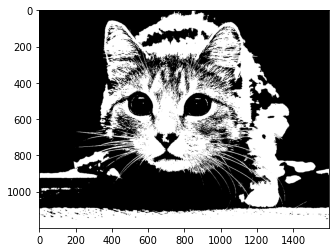

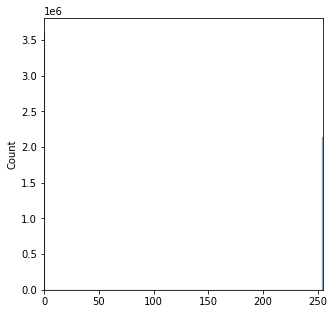

In [175]:
print('Изображение после пороговой обработки')
plt.imshow(x3)
histog1(x3)

## 6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей

In [177]:
def linear_contrast(arr1):
    arr = arr1.copy()
    results = {
        "orig_img": arr, 
        "res_img": None
    }
    
    x_min = arr.flatten().min()
    x_max = arr.flatten().max()
    
    y_min = 0
    y_max = 255
    
    a = (y_max - y_min) / (x_max - x_min)
    b = (y_min * x_max - y_max * x_min) / (x_max - x_min)

    result_image = (np.vectorize(lambda x: a * x + b)(arr)).astype(np.uint8)
    
    results["res_img"] = result_image
    return results

In [178]:
x4 = linear_contrast(x1)

# 7. Сделать эквализацию гистограммы изображения

In [222]:
def hist3(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

In [224]:
def ecv(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[img]
    return img2

Исходное изображение


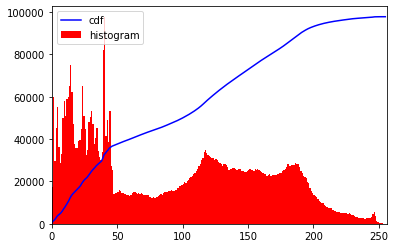

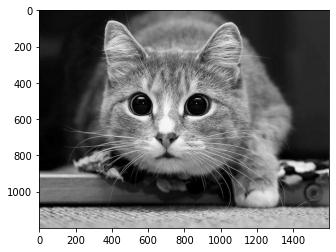

In [223]:
print('Исходное изображение')
ecv(x1)
plt.imshow(x1)

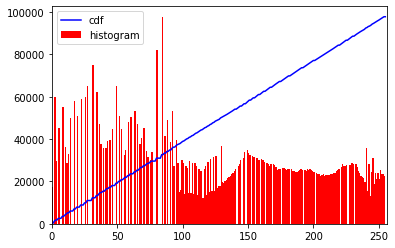

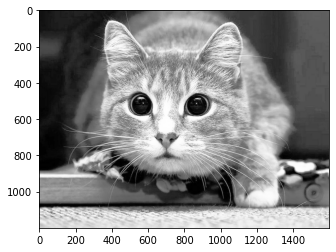

In [230]:
x5 = ecv(x1)
hist3(x5)
plt.imshow(x5)

# 8. Сделать эквализацию методом CLAHE (Функция OpenCV)

In [234]:
image_bw = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit = 2)
x6 = clahe.apply(image_bw)

Исходное изображение


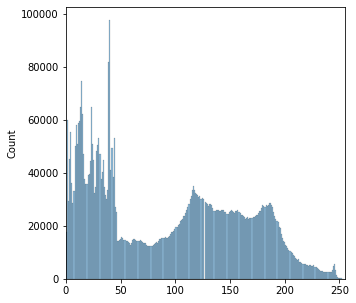

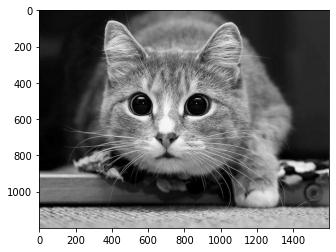

In [236]:
print('Исходное изображение')
histog1(x1)
plt.imshow(from_bgr_to_rgb(x1))

ИЗображение после эквализации


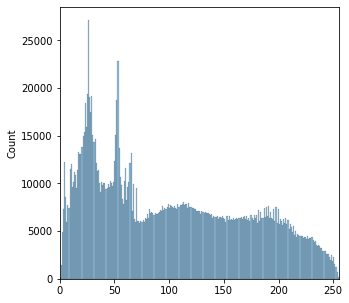

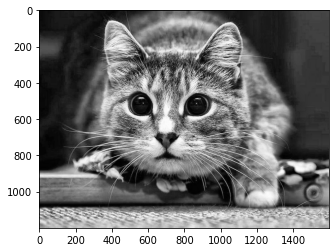

In [235]:
print('ИЗображение после эквализации')
histog1(x6)
plt.imshow(from_bgr_to_rgb(x6))

# 9.  Осуществить препарирование изображения с заданной препарирующей функцией

In [164]:
x9 = func_prep(x1)

Исходное изображение


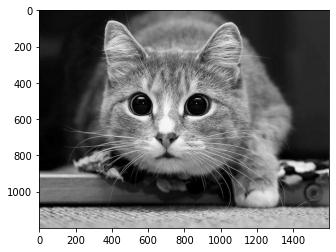

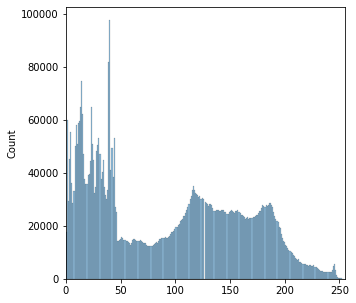

Препарированое изображение


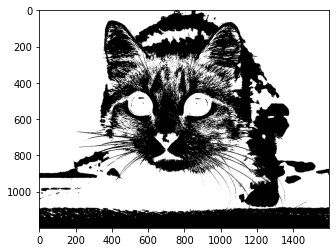

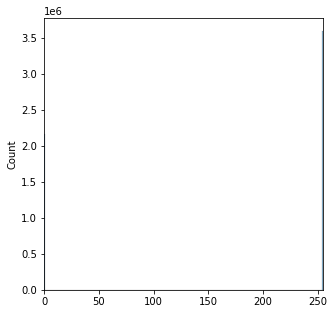

In [167]:
print('Исходное изображение')
plt.imshow(x1)
histog1(x1)
print('Препарированое изображение')
plt.imshow(x9)
histog1(x9)